### Importando as bibliotecas do python para análise e exploração de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Lendo o DataSet

In [2]:
df = pd.read_excel(r"C:\\Users\\MarkevR\\OneDrive - BASF\\Desktop\\Data Science\\Conhecendo Pandas\\Business_Case\\Database Business Case.xlsx")

### Exibindo as primeiras 5 linhas do DataSet

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales ($),Quantity,Price
0,1,CA-2016-152156,2016-11-08 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,NaN
1,2,CA-2016-152156,2016-11-08 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,NaN
2,3,CA-2016-138688,2016-06-12 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,NaN
3,4,US-2015-108966,2015-10-11 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,NaN
4,5,US-2015-108966,2015-10-11 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,NaN


## Analisando o número de vendas pela região

### Exibindo quais regiões existem no DataSet

In [4]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

### Agrupando as colunas Region e Quantity em um novo dataframe com a soma das vendas por cada região

In [5]:
df_vendas_regiao = df.groupby('Region')[['Quantity']].sum()

### Salvando o novo dataframe em uma variável

In [6]:
df_vendas_regiao_organizado = df_vendas_regiao.sort_values(by='Quantity', ascending=False)

In [7]:
df_vendas_regiao_organizado

,Quantity
Region,
West,12266
East,10618
Central,8780
South,6209


### Plotando o gráfico

C:\Users\MarkevR\AppData\Local\Temp\ipykernel_11044\1029757604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_vendas_regiao_organizado.reset_index(), x='Region', y='Quantity', palette='viridis')


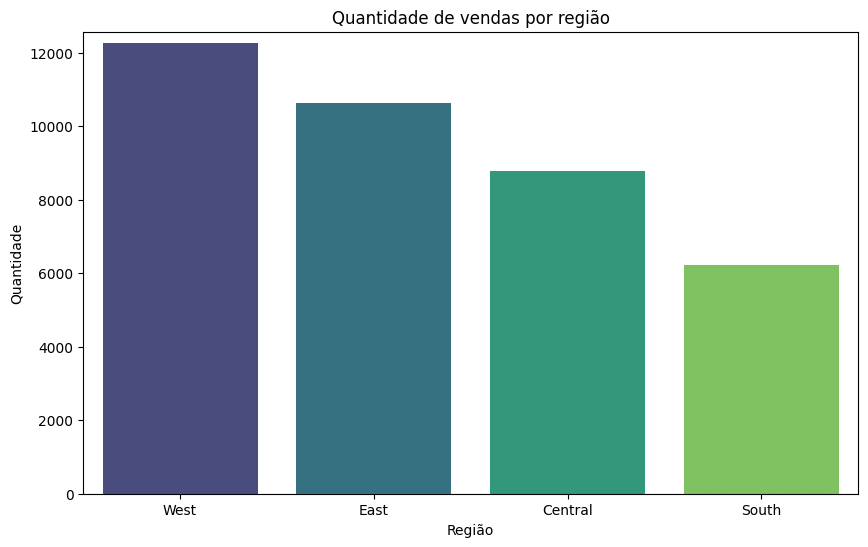

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vendas_regiao_organizado.reset_index(), x='Region', y='Quantity', palette='viridis')
plt.title('Quantidade de vendas por região')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.ylim(0, df_vendas_regiao_organizado['Quantity'].max() + 300)  # Define o limite do eixo y
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Linha de referência no zero
plt.show()

## Analisando qual a categoria dos produtos mais vendida

### Visualizando quais categorias de produtos existem no dataframe

In [9]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### Agrupando num dataframe as colunas Category com a soma das quantidades vendidas de cada categoria na coluna Quantity

In [10]:
df_qtd_categoria = df.groupby('Category')[['Quantity']].sum()

In [11]:
df_qtd_categoria

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


### Ordenando o dataframe

In [12]:
df_categoria = df_qtd_categoria.sort_values(by='Quantity', ascending=False)

In [13]:
df_categoria

,Quantity
Category,
Office Supplies,22906
Furniture,8028
Technology,6939


### Plotando o gráfico

C:\Users\MarkevR\AppData\Local\Temp\ipykernel_11044\520709117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_categoria.reset_index(), x='Category', y='Quantity', palette='viridis')


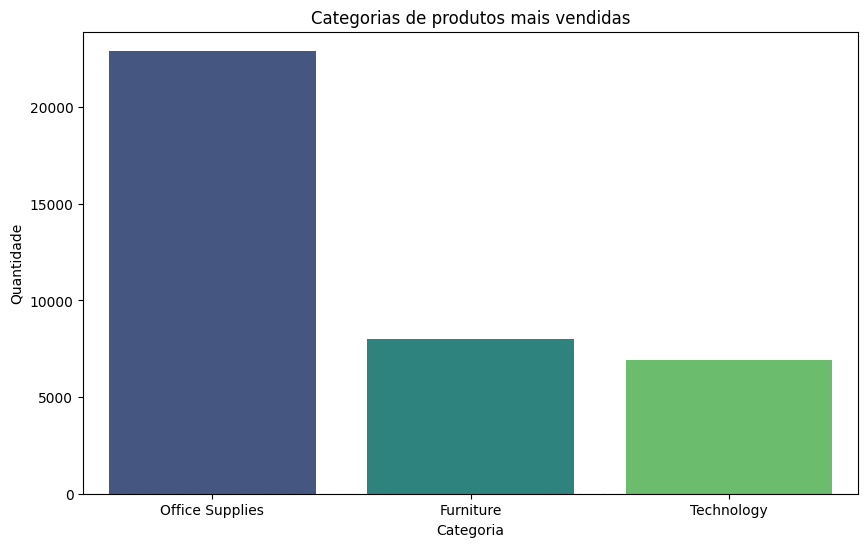

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_categoria.reset_index(), x='Category', y='Quantity', palette='viridis')
plt.title('Categorias de produtos mais vendidas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.ylim(0, df_categoria['Quantity'].max() + 1000)  # Define o limite do eixo y
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Linha de referência no zero
plt.show()

## Analisando quais clientes realizaram o maior numero de compras

### Visualizando todos os clientes existentes no dataset

In [15]:
df['Customer Name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Alejandro Grove', 'Zuschuss Donatelli', 'Ken Black',
       'Sandra Flanagan', 'Emily Burns', 'Eric Hoffmann',
       'Tracy Blumstein', 'Matt Abelman', 'Gene Hale', 'Steve Nguyen',
       'Linda Cazamias', 'Ruben Ausman', 'Erin Smith', 'Odella Nelson',
       "Patrick O'Donnell", 'Lena Hernandez', 'Darren Powers',
       'Janet Molinari', 'Ted Butterfield', 'Kunst Miller',
       'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
   

### Agrupandos os clientes com seus respectivos gastos em nossa loja

In [16]:
df_cliente_vendas = df.groupby('Customer Name')[['Sales ($)']].sum()

In [17]:
df_cliente_vendas

,Sales ($)
Customer Name,
Aaron Bergman,886.156
Aaron Hawkins,1744.700
Aaron Smayling,3050.692
Adam Bellavance,7755.620
Adam Hart,3250.337
...,...
Xylona Preis,2374.658
Yana Sorensen,6720.444
Yoseph Carroll,5454.350


### Ordenando o dataframe

In [18]:
df_cliente_vendas.sort_values(by='Sales ($)', ascending=False)

,Sales ($)
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Roy Skaria,22.328
Mitch Gastineau,16.739
Carl Jackson,16.520


### Exibindo apenas os 15 clientes que mais gastaram

In [19]:
df_cliente_vendas_15 = df_cliente_vendas.head(15).sort_values(by='Sales ($)', ascending=False)

In [20]:
df_cliente_vendas_15

,Sales ($)
Customer Name,
Adrian Barton,14473.571
Adam Bellavance,7755.620
Alan Dominguez,6106.880
Alan Hwang,4805.344
Alan Schoenberger,4260.784
Adam Shillingsburg,3255.310
Adam Hart,3250.337
Aaron Smayling,3050.692
Aaron Hawkins,1744.700


### Plotando gráfico

C:\Users\MarkevR\AppData\Local\Temp\ipykernel_11044\276924785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cliente_vendas_15, x='Sales ($)', y='Customer Name', palette='viridis')


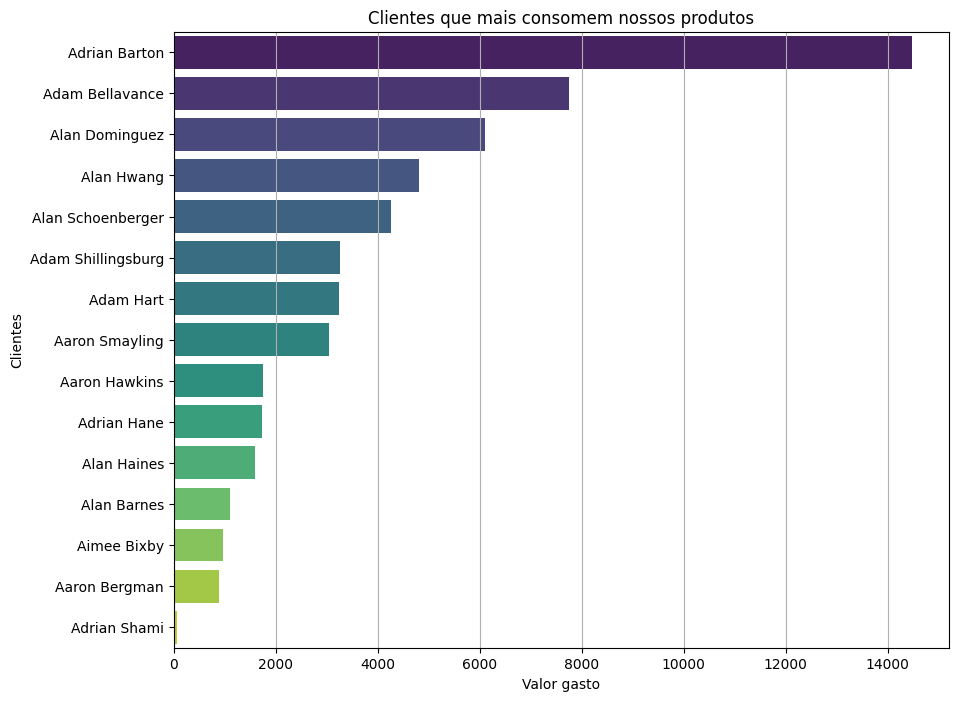

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_cliente_vendas_15, x='Sales ($)', y='Customer Name', palette='viridis')
plt.title('Clientes que mais consomem nossos produtos')
plt.xlabel('Valor gasto')
plt.ylabel('Clientes')
plt.grid(axis='x')
plt.show()

In [22]:
df_cliente_vendas_15_menos = df_cliente_vendas.tail(15).sort_values(by='Sales ($)', ascending=True)

In [23]:
df_cliente_vendas_15_menos

,Sales ($)
Customer Name,
Vivian Mathis,380.690
Vivek Grady,427.372
Vivek Gonzalez,846.010
Vicky Freymann,847.944
Victor Preis,993.902
Vivek Sundaresam,1055.981
Zuschuss Donatelli,1493.944
Victoria Brennan,2005.596
Xylona Preis,2374.658


C:\Users\MarkevR\AppData\Local\Temp\ipykernel_11044\2263961530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cliente_vendas_15_menos, x='Sales ($)', y='Customer Name', palette='viridis')


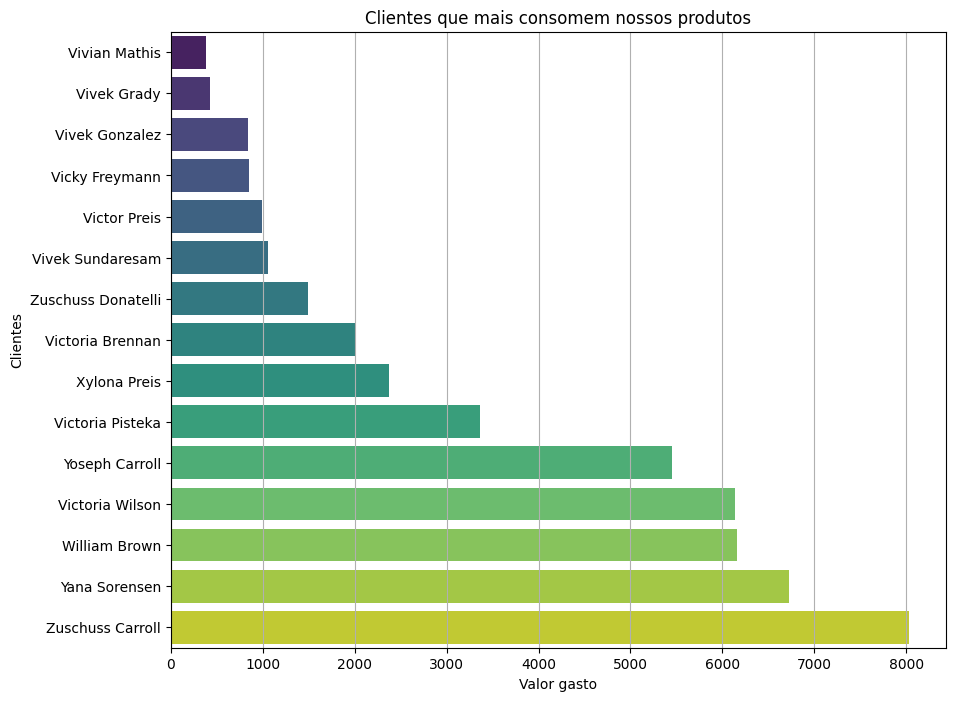

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_cliente_vendas_15_menos, x='Sales ($)', y='Customer Name', palette='viridis')
plt.title('Clientes que mais consomem nossos produtos')
plt.xlabel('Valor gasto')
plt.ylabel('Clientes')
plt.grid(axis='x')
plt.show()